Solution 1:
[1, 3, 0, 2]


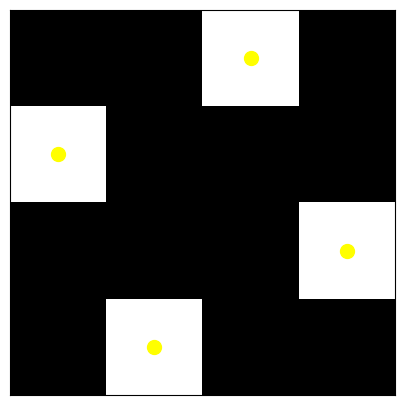

Solution 2:
[2, 0, 3, 1]


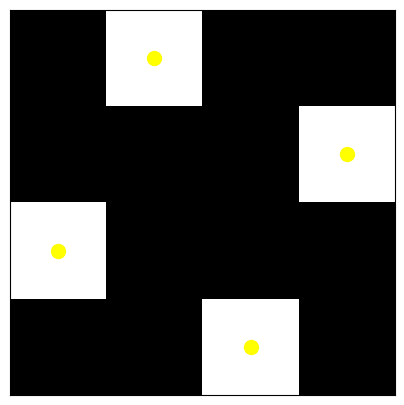

4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model

board_size = 4
model = cp_model.CpModel()
queens = [model.NewIntVar(0, board_size - 1, 'x%i' % i) for i in range(board_size)]

# Add constraints that all queens are in different rows
model.AddAllDifferent(queens)

# Add diagonal constraints
for i in range(board_size):
    for j in range(i + 1, board_size):
        # Queens cannot be on the same diagonal
        model.Add(queens[i] - i != queens[j] - j)
        model.Add(queens[i] + i != queens[j] + j)

solver = cp_model.CpSolver()
solver.parameters.enumerate_all_solutions = True

class SolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Callback to print and plot each solution."""
    def __init__(self, queens, board_size):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self._queens = queens
        self._board_size = board_size
        self._solution_count = 0

    def on_solution_callback(self):
        self._solution_count += 1
        print('Solution %i:' % self._solution_count)
        solution = [self.Value(queens[i]) for i in range(self._board_size)]
        print(solution)
        self.plot_solution(solution)

    def plot_solution(self, solution):
        fig = plt.figure(figsize=(5, 5))
        board = np.zeros((self._board_size, self._board_size))
        for i in range(self._board_size):
            board[solution[i], i] = 1
        plt.imshow(board, cmap='binary_r')
        plt.xticks([])
        plt.yticks([])
        for i in range(self._board_size):
            plt.scatter(i, solution[i], color='yellow', s=100)  # Plot queens
        plt.show()

# Solve the model and display each solution
solution_printer = SolutionPrinter(queens, board_size)
solver.SearchForAllSolutions(model, solution_printer)
